In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [326]:
close = pd.read_csv('stocks-us-adjClose.csv')
high = pd.read_csv('stocks-us-adjHigh.csv')
low = pd.read_csv('stocks-us-adjLow.csv')
adjopen = pd.read_csv('stocks-us-adjOpen.csv')
volume = pd.read_csv('stocks-us-Volume.csv')

In [327]:
start_date = '1/1/2016'
end_date = '1/1/2017'

<h3> Clean data, drop null values, transpose columns and rows </h3>

In [244]:
def cleanify(data):
    
    data.iloc[:,0] = data.iloc[:,0].apply(lambda x: datetime.datetime
                                          .strptime(x, '%Y-%m-%d'))
    data = data[(data.iloc[:,0] >= start_date) & (data.iloc[:,0] < end_date)]
    data = data.dropna(axis=1, how='all')
    data = data.dropna(axis=0, how='all')
    data = data.transpose()
    data = data.reset_index()
    new_header = data.iloc[0]
    data = data[1:]
    data.columns = new_header
    data.rename(columns={'compiled from Yahoo! Finance data by Matt Borthwick'
                        :'Symbol'}, inplace=True)
    return data

In [328]:
close = cleanify(close)
adjopen = cleanify(adjopen)

<h3> Set df values to daily % change </h3>

In [329]:
for x in close.columns:
    if x != close.columns[0]:
        close[x] = (close[x] - adjopen[x]) / adjopen[x] 
        
df = close

In [330]:
df.head()

,Symbol,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,...,2016-12-16 00:00:00,2016-12-19 00:00:00,2016-12-20 00:00:00,2016-12-21 00:00:00,2016-12-22 00:00:00,2016-12-23 00:00:00,2016-12-27 00:00:00,2016-12-28 00:00:00,2016-12-29 00:00:00,2016-12-30 00:00:00
1,ED,0.008614,0.00729364,0.0119473,0.0182832,0.0092677,-0.00420481,-0.0128108,0.0152253,0.0159256,...,0.0123973,0.000136953,0.00575192,-0.00435728,0.00533442,-0.000271629,0.00326483,-0.00881716,0.0124384,-0.0053996
2,DD,-0.0342979,0.0247091,0.00110567,-0.0153698,-0.02128,-0.0299951,-0.015953,-0.0364777,0.00896472,...,-0.00239872,0.000933837,0.00213054,0.00265741,-0.000931586,-0.00173193,-0.0019971,-0.0115615,-0.00552416,-0.00690032
3,CVX,-0.00759524,0.00628858,-0.0156679,-0.0180959,-0.0151097,-0.0251056,-0.000608215,-0.0220058,0.0429531,...,0.00203671,-0.00608263,0.000848527,-0.00363353,0.00703743,8.4401e-05,-0.00236286,-0.00338089,-0.00161005,0.00221386
4,FL,0.0131864,0.0140867,-0.000306463,0.00656053,-0.0420167,-0.00476794,0.000157794,-0.0280624,0.00555465,...,-0.0123068,-0.00423,-0.000792873,0.00819124,-0.0350502,-0.00305684,-0.00111118,-0.0101573,-0.0051923,-0.00112726
5,CAT,0.0165969,-0.0160865,0.00363743,-0.0175169,-0.0161667,-0.0345531,-0.0134529,-0.0190108,0.016819,...,-0.0187599,0.0084847,0.0074754,-0.00466796,0.00362554,0.00565091,0.00222607,-0.0153277,0.00010722,-0.00322445


<h3> Merge S&P 500 data, filter symbols to 3 most common sectors </h3>

In [331]:
sp = pd.read_csv('sp500.csv')

df = pd.merge(sp, df, on='Symbol')

df['Sector'].value_counts()
df = df[(df['Sector'] == 'Consumer Discretionary') |
        (df['Sector'] == 'Information Technology') |
        (df['Sector'] == 'Financials')]

label = df['Symbol']
sector = df['Sector']
df = df.drop(['Symbol','Sector', 'Name'],1)

df = df.dropna(axis=0, how='any')

In [332]:
import sklearn
from sklearn.cluster import FeatureAgglomeration

#features = test.drop('DATE',1)
agglo = FeatureAgglomeration(n_clusters=3).fit_transform(df)

<h3> Consumer: Green, IT: Blue, Financials: Red </h3>

In [333]:
color=[]
for i in sector:
    if i == 'Consumer Discretionary':
        color.append('g')
    if i == 'Information Technology':
        color.append('b')
    if i == 'Financials':
        color.append('r')

<h3> 2015 data </h3>

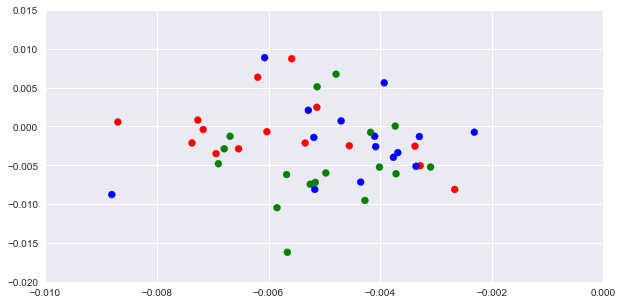

In [325]:
plt.figure(figsize=(10,5))
plt.ylim((-.02,.015))
plt.xlim((-.01,.00))
plt.scatter(agglo[:,0],agglo[:,1],c=color)
plt.show()

<h3> 2016 data </h3>

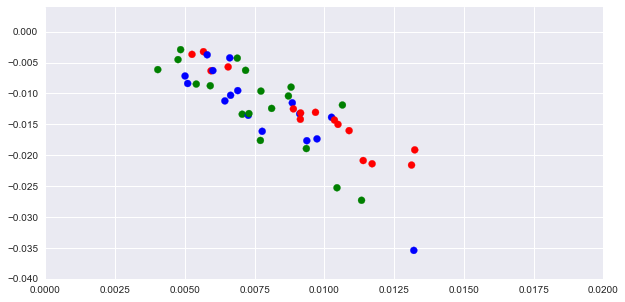

In [339]:
plt.figure(figsize=(10,5))
plt.ylim((-.04,.004))
plt.xlim((-.0,.02))
plt.scatter(agglo[:,0],agglo[:,1],c=color)
plt.show()